In [ ]:
# Dump Path: r'/content/drive/My Drive/BE Project/General Dataset Classification Dumps/'
# Final Datasets Path
# 1. r'/content/drive/My Drive/Predictive Analysis of Crowdfunding Platforms/7.General Dataset (Final)/General Dataset Cleaned Final 1.csv'
# 2. r'/content/drive/My Drive/Predictive Analysis of Crowdfunding Platforms/7.General Dataset (Final)/General Dataset Cleaned Final 2.csv'

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the dataset
df = pd.read_csv(r'/content/drive/My Drive/Predictive Analysis of Crowdfunding Platforms/7.General Dataset (Final)/General Dataset Cleaned Final 1.csv')
df.head()

,name,description,country,currency,main_category,sub_category,time_before_launch,state_change_time,funding_time,goal_amount,goal_amount_usd,pledged_amount,pledged_amount_usd,no_of_backers,description_score,description_prediction,state
0,Ardmore Junction: A Feature Film,A film about chance meetings and changed lives.,1,1,1,100,7,30,30,23333.0,23333,23508.83,23509,256,1.554951,1,1
1,Support producing 3 Peace Day events in NYC,Milestone Broadcast is producing www.peaceday...,1,1,1,200,19,30,30,2000.0,2000,2249.00,2249,8,-0.143421,1,1
2,Mojobot - World's first tangible coding robot ...,Teaching kids computer science and robotics th...,10,6,4,300,20,30,30,78000.0,9949,151868.00,19370,59,0.232367,1,1
3,The World's Best Passport Case for Two | futar...,Share everything in life's journey with your p...,20,14,11,400,113,48,48,220000.0,2033,237609.00,2196,6,0.909679,1,1
4,"The Little Girl, The Ocean, and The Moon: A Ch...",This book is dedicated to your inner child. It...,1,1,5,500,673,43,43,20000.0,20000,26156.00,26156,463,9.094467,1,1


### Classification

In [ ]:
df = df[['country', 'currency', 'main_category', 'sub_category', 'funding_time', 'goal_amount', 'description_score', 'description_prediction', 'state']]
X = df.drop(['state'], axis=1)
y = df['state']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [ ]:
# Import Libraries
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_curve, auc

In [ ]:
# Train Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print("Train Shape:", X_train.shape)
print("Test Shape:", X_test.shape)

Train Shape: (123101, 8)
Test Shape: (30776, 8)


### Algorithms

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
print("Score: ", dt.score(X_test, y_test))

Score:  0.8407850272939953


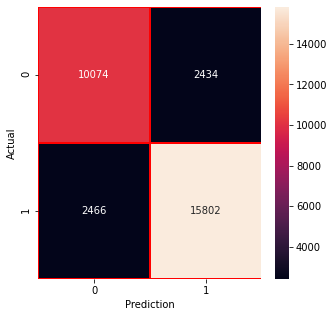

In [ ]:
# Confusion Matrix
y_predict = dt.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm, annot = True, linewidths=0.5, linecolor="red", fmt =".0f", ax=ax)
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.80      0.81      0.80     12508
           1       0.87      0.87      0.87     18268

    accuracy                           0.84     30776
   macro avg       0.83      0.84      0.84     30776
weighted avg       0.84      0.84      0.84     30776



In [ ]:
# Cross Validation Score
from sklearn.model_selection import cross_val_score
dt_eval = cross_val_score(estimator = dt, X = X_train, y = y_train, cv = 10)
dt_eval.mean()

0.8415366330798191

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
for i in range(100, 1001, 100):
  clf = RandomForestClassifier(n_estimators=i)
  clf.fit(X_train, y_train)
  y_predict = clf.predict(X_test)
  print("Accuracy:", metrics.accuracy_score(y_test, y_predict))

Accuracy: 0.8900116974265662
Accuracy: 0.8905965687548739
Accuracy: 0.8900766831297114
Accuracy: 0.8900116974265662
Accuracy: 0.890401611645438
Accuracy: 0.8906940473095919
Accuracy: 0.8903691187938654
Accuracy: 0.8909214972706004
Accuracy: 0.8908890044190279
Accuracy: 0.8910839615284637


In [ ]:
import pickle
with open(r'/content/drive/My Drive/BE Project/General Dataset Classification Dumps/Final Model','wb') as f:
  pickle.dump(clf,f)

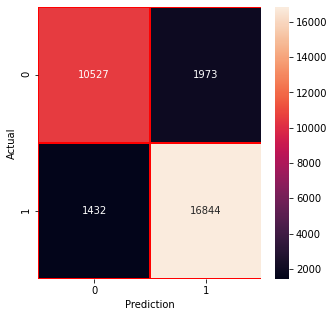

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_predict)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm, annot = True, linewidths=0.5, linecolor="red", fmt =".0f", ax=ax)
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86     12500
           1       0.90      0.92      0.91     18276

    accuracy                           0.89     30776
   macro avg       0.89      0.88      0.88     30776
weighted avg       0.89      0.89      0.89     30776



In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
print("Score: ", lr.score(X_test,y_test))

Score:  0.8692812581232129


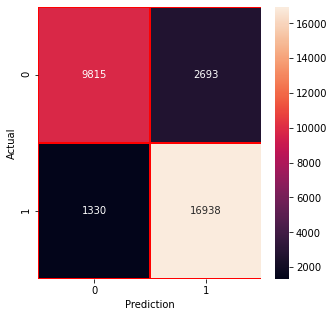

In [ ]:
# Confusion Matrix
y_predict = lr.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm, annot = True, linewidths=0.5, linecolor="red", fmt =".0f", ax=ax)
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.88      0.78      0.83     12508
           1       0.86      0.93      0.89     18268

    accuracy                           0.87     30776
   macro avg       0.87      0.86      0.86     30776
weighted avg       0.87      0.87      0.87     30776



In [ ]:
# Cross Validation Score
from sklearn.model_selection import cross_val_score
lr_eval = cross_val_score(estimator = lr, X = X_train, y = y_train, cv = 10)
lr_eval.mean()

0.8682301747672575

In [ ]:
# SVM 
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)
print("Score: ", clf.score(X_test,y_test))

Score:  0.86814400831817


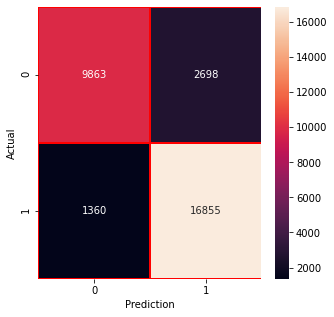

In [ ]:
# Confusion Matrix
y_predict = clf.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm, annot = True, linewidths=0.5, linecolor="red", fmt =".0f", ax=ax)
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.88      0.79      0.83     12561
           1       0.86      0.93      0.89     18215

    accuracy                           0.87     30776
   macro avg       0.87      0.86      0.86     30776
weighted avg       0.87      0.87      0.87     30776



In [ ]:
# KNN 
from sklearn.neighbors import KNeighborsClassifier
for i in range(1, 101, 10):
  neigh = KNeighborsClassifier(n_neighbors=i)
  neigh.fit(X_train, y_train)
  print("Score: ", neigh.score(X_test,y_test))

Score:  0.8390953990122173
Score:  0.8767221211333507
Score:  0.8768195996880687
Score:  0.8761372498050429
Score:  0.8762672212113335
Score:  0.874155185859111
Score:  0.8732778788666493
Score:  0.873310371718222
Score:  0.8725955289836236
Score:  0.8725955289836236


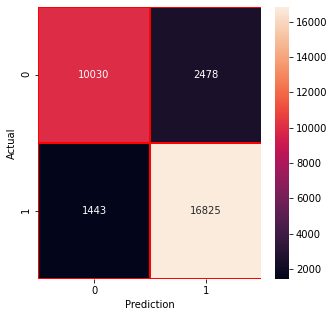

In [ ]:
# Confusion Matrix
y_predict = neigh.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm, annot = True, linewidths=0.5, linecolor="red", fmt =".0f", ax=ax)
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.87      0.80      0.84     12508
           1       0.87      0.92      0.90     18268

    accuracy                           0.87     30776
   macro avg       0.87      0.86      0.87     30776
weighted avg       0.87      0.87      0.87     30776



In [ ]:
# Cross Validation Score
from sklearn.model_selection import cross_val_score
neigh_eval = cross_val_score(estimator = neigh, X = X_train, y = y_train, cv = 10)
neigh_eval.mean()

0.8718694607221547

In [ ]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
print("Score: ", clf.score(X_test,y_test))

Score:  0.8593384455419808


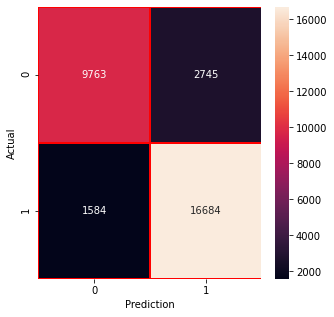

In [ ]:
# Confusion Matrix
y_predict = clf.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm, annot = True, linewidths=0.5, linecolor="red", fmt =".0f", ax=ax)
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82     12508
           1       0.86      0.91      0.89     18268

    accuracy                           0.86     30776
   macro avg       0.86      0.85      0.85     30776
weighted avg       0.86      0.86      0.86     30776



In [ ]:
# Cross Validation Score
from sklearn.model_selection import cross_val_score
clf_eval = cross_val_score(estimator = clf, X = X_train, y = y_train, cv = 10)
clf_eval.mean()

0.8591725726452688

### **Feature Extraction**


In [ ]:
df1=df[['sub_category','funding_time','description_score','description_prediction']]
df.corr()['state']

country                  -0.047407
currency                 -0.037981
main_category            -0.053508
sub_category             -0.069954
funding_time             -0.167838
goal_amount              -0.034305
description_score         0.211476
description_prediction    0.727862
state                     1.000000
Name: state, dtype: float64

In [ ]:
#df1.head()
X=df1
y = df['state']

In [ ]:
# Train Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print("Train Shape:", X_train.shape)
print("Test Shape:", X_test.shape)

Train Shape: (123101, 4)
Test Shape: (30776, 4)


In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
print("Score: ", dt.score(X_test, y_test))

Score:  0.839972706004679


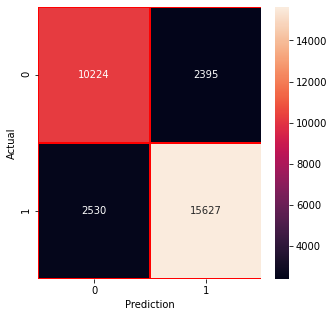

In [ ]:
# Confusion Matrix
y_predict = dt.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm, annot = True, linewidths=0.5, linecolor="red", fmt =".0f", ax=ax)
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81     12619
           1       0.87      0.86      0.86     18157

    accuracy                           0.84     30776
   macro avg       0.83      0.84      0.83     30776
weighted avg       0.84      0.84      0.84     30776



### **MLP**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(12, input_dim=X_train.shape[1], activation='swish'))
# model.add(Dense(10,  activation='swish'))
model.add(Dense(8,  activation='swish'))
model.add(Dense(1,  activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
h=model.fit(X_train, y_train, epochs=150, batch_size=8)

Epoch 1/150
15388/15388 [==============================] - 15s 953us/step - loss: 0.3775 - accuracy: 0.8638
Epoch 2/150
15388/15388 [==============================] - 15s 985us/step - loss: 0.3442 - accuracy: 0.8720
Epoch 3/150
15388/15388 [==============================] - 15s 961us/step - loss: 0.3438 - accuracy: 0.8718
Epoch 4/150
15388/15388 [==============================] - 15s 967us/step - loss: 0.3378 - accuracy: 0.8746
Epoch 5/150
15388/15388 [==============================] - 15s 969us/step - loss: 0.3398 - accuracy: 0.8732
Epoch 6/150
15388/15388 [==============================] - 15s 974us/step - loss: 0.3378 - accuracy: 0.8737
Epoch 7/150
15388/15388 [==============================] - 15s 981us/step - loss: 0.3358 - accuracy: 0.8745
Epoch 8/150
15388/15388 [==============================] - 15s 963us/step - loss: 0.3296 - accuracy: 0.8770
Epoch 9/150
15388/15388 [==============================] - 15s 964us/step - loss: 0.3392 - accuracy: 0.8716
Epoch 10/150
15388/15388 [==

In [ ]:
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

962/962 [==============================] - 1s 684us/step - loss: 0.3208 - accuracy: 0.8769
Accuracy: 87.69


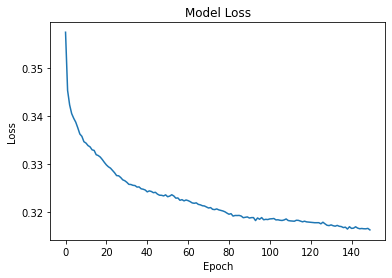

In [ ]:
plt.plot(h.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()